# Hierarchical Indexing

## Chuỗi được lập chỉ mục nhiều lần

* Hãy bắt đầu bằng cách xem xét cách chúng ta có thể biểu diễn dữ liệu hai chiều trong Chuỗi một chiều. Để rõ ràng, chúng ta sẽ xem xét một chuỗi dữ liệu trong đó mỗi điểm có một ký tự và khóa số.

#### Con đường tồi tệ

* Giả sử bạn muốn theo dõi dữ liệu về các trạng thái từ hai năm khác nhau. Bằng cách sử dụng các công cụ Pandas mà chúng tôi đã đề cập, bạn có thể bị cám dỗ chỉ cần sử dụng các bộ dữ liệu Python làm khóa:

In [1]:
import pandas as pd
import numpy as np

In [2]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [3]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [4]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

### The Better Way: Pandas MultiIndex

### Cách lập chỉ mục

In [5]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

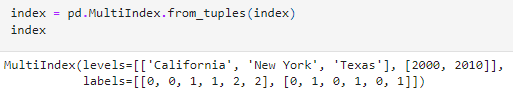

#### Lưu ý rằng MultiIndex chứa nhiều cấp độ lập chỉ mục – trong trường hợp này là tên tiểu bang và năm, cũng như nhiều nhãn cho mỗi điểm dữ liệu mã hóa các cấp độ này.

* Nếu chúng tôi lập chỉ mục lại chuỗi của mình với MultiIndex này, chúng tôi sẽ thấy biểu diễn phân cấp của dữ liệu:

In [6]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Ở đây, hai cột đầu tiên của biểu diễn Chuỗi hiển thị nhiều giá trị chỉ mục, trong khi cột thứ ba hiển thị dữ liệu. Lưu ý rằng một số mục nhập bị thiếu trong cột đầu tiên: trong biểu diễn nhiều chỉ mục này, bất kỳ mục nhập trống nào đều cho biết cùng một giá trị với dòng phía trên nó.

Bây giờ để truy cập tất cả dữ liệu có chỉ mục thứ hai là 2010, chúng ta có thể chỉ cần sử dụng ký hiệu cắt lát Pandas:

In [7]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

## MultiIndex as extra dimension

* Bạn có thể nhận thấy điều gì đó khác ở đây: chúng tôi có thể dễ dàng lưu trữ cùng một dữ liệu bằng cách sử dụng DataFrame đơn giản với các nhãn chỉ mục và cột. Trên thực tế, Pandas được xây dựng với suy nghĩ về sự tương đương này. Phương thức unack () sẽ nhanh chóng chuyển đổi một Chuỗi được lập chỉ mục nhân thành một DataFrame được lập chỉ mục theo quy ước:

### Chuyển một chuỗi được lập chỉ mục thành DataFrame

In [8]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


### Đương nhiên, phương thức stack () cung cấp hoạt động ngược lại:

In [10]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

* Nhìn thấy điều này, bạn có thể tự hỏi tại sao chúng ta lại bận tâm đến việc lập chỉ mục phân cấp. Lý do rất đơn giản: giống như chúng tôi có thể sử dụng lập chỉ mục đa để biểu diễn dữ liệu hai chiều trong Chuỗi một chiều, chúng tôi cũng có thể sử dụng nó để biểu diễn dữ liệu từ ba thứ nguyên trở lên trong Chuỗi hoặc DataFrame. Mỗi cấp bổ sung trong nhiều chỉ mục đại diện cho một thứ nguyên bổ sung của dữ liệu; việc tận dụng thuộc tính này mang lại cho chúng tôi sự linh hoạt hơn nhiều trong các loại dữ liệu mà chúng tôi có thể đại diện. Cụ thể, chúng tôi có thể muốn thêm một cột dữ liệu nhân khẩu học khác cho mỗi tiểu bang tại mỗi năm (ví dụ: dân số dưới 18 tuổi); với MultiIndex, điều này dễ dàng như thêm một cột khác vào DataFrame:

In [11]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [15]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


In [17]:
np.random.rand(4, 2)

array([[0.42135022, 0.57406221],
       [0.21119223, 0.63650211],
       [0.70022943, 0.50274865],
       [0.43471586, 0.58648898]])

## Methods of MultiIndex Creation

In [18]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.313721  0.022519
  2  0.546374  0.832181
b 1  0.372232  0.384703
  2  0.194968  0.126701

In [19]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

## Cách tạo chỉ mục đơn giản

In [23]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [24]:
# or
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [25]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  38.1  42.0  37.4  51.0  36.9
     2      49.0  38.1  24.0  38.8  28.0  36.3
2014 1      72.0  36.2  35.0  35.5  38.0  37.6
     2      49.0  38.2  28.0  35.8  50.0  36.9